# Trabalho Final de Inteligência Artificial

#### Repositório

O repositório escolhido como fonte do dataset foi o [*kaggle*](https://www.kaggle.com), já é muito conhecido pelos cientistas de dados pois além de contem datasets para estudo, também possui uma grande comunidade, competições, tutorias, entre outros recursos que possibilitam um rico ambiente de aprendizagem.

#### Problema escolhido

O Dataset analisado e escolhido foi o [*avocado prices*](https://www.kaggle.com/neuromusic/avocado-prices), ele contêm dados sobre a variação de preços na venda de abacates no Estados Unidos. Contempla informações de 2015 (final do ano) até 2018 (começo do ano).

#### Motivações

<ul>
    <li> Trabalhar com séries temporais é um desafio novo e interessante </li>
    <li> Tirar grande proveito das técnicas abordadas e com isso encarar novos desafio </li>
</ul>

#### Objetivo

Aplicar conceitos de classificação no dataset selecionado e assim identificar se o abacate em questão é do tipo orgânico ou convencional

In [68]:
!wget 'https://www.dropbox.com/s/blygqpyj0od77q5/avocado.csv'

--2019-06-12 01:25:58--  https://www.dropbox.com/s/blygqpyj0od77q5/avocado.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/blygqpyj0od77q5/avocado.csv [following]
--2019-06-12 01:25:58--  https://www.dropbox.com/s/raw/blygqpyj0od77q5/avocado.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a01e99d9b267cd853f52410f5.dl.dropboxusercontent.com/cd/0/inline/AioQ6Uv1pSTxAIg_Pmdj--zwY2MlEHtyt6b30eBLOxSjK_GBX9KmzatNBybgB2T155yJ-MKszni7bPRb1nROxnoL5cIi9rpYuQeWxzaU6Fwqlg/file# [following]
--2019-06-12 01:25:58--  https://uc3a01e99d9b267cd853f52410f5.dl.dropboxusercontent.com/cd/0/inline/AioQ6Uv1pSTxAIg_Pmdj--zwY2MlEHtyt6b30eBLOxSjK_GBX9KmzatNBybgB2T155yJ-MKszni7bPRb1nROxnoL5cIi9rpYuQeWxzaU6Fwqlg/file
Resolving uc3a01e99d9b

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d') 

In [0]:
df_alldata = pd.read_csv('avocado.csv',parse_dates=['Date'], index_col='Date',date_parser=dateparse)

### Análise prévia dos dados

Primeiramente é possível identificar uma discrepância no valor cobrado pelos dois tipos de abacates

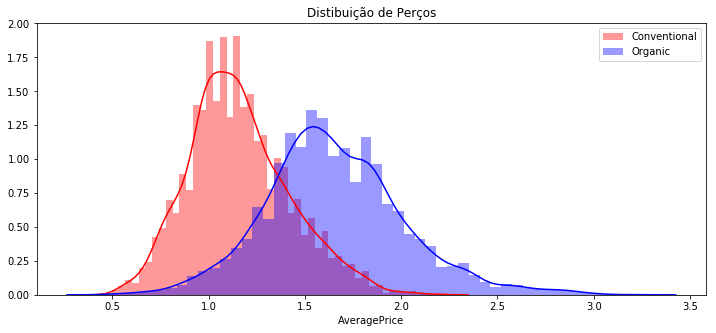

In [72]:
plt.figure(figsize=(12,5))
plt.title("Distibuição de Perços")

data_conventional = df_alldata[df_alldata['type'] == 'conventional']["AveragePrice"]
data_organic = df_alldata[df_alldata['type'] == 'organic']["AveragePrice"]

ax = sbn.distplot(data_conventional, color = 'r', label='Conventional')
ax = sbn.distplot(data_organic, color = 'b', label='Organic')
plt.legend()

In [0]:
print('Conventional mean %2.2f' % data_conventional.mean())
print('Organic mean %2.2f' % data_organic.mean())

Conventional mean 1.16
Organic mean 1.65


Os produtos orgânicos possuem um preço mais elevado, com isso é possível identificar um padrão, facilitando na classificação pelo atributo tipo

In [0]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
Unnamed: 0      18249 non-null int64
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(2)
memory usage: 1.9+ MB


### Tratamentos dos dados

Verificado que os atributos *type* e *region* são do tipo *object*, havendo assim necessidade de normaliza-los para um tipo numério.
<p> Não há valores nulos no dataset, portanto não há necessidade de criar um tratamento para este cenário </p>

In [0]:
df_alldata['type'].unique()

array(['conventional', 'organic'], dtype=object)

Identificado **dois valores** no atributo *type*, é possível subistitir os mesmos por valores numéricos através da função apply

In [0]:
df_alldata['type'] = df_alldata['type'].apply(lambda x:  0 if x == 'conventional' else 1)

In [0]:
df_alldata['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Atributo *region* pois **53** atributos pois representa as regiões da America do Norte. Neste cenário foi decidido criar um dicionário, no qual cada região é representado por um valor/índice específico e então criado uma função para mapear os valores no dataset

In [0]:
ufs = {'Albany':0, 'Atlanta':1, 'BaltimoreWashington':2, 'Boise':3, 'Boston':4,
       'BuffaloRochester':5, 'California':6, 'Charlotte':7, 'Chicago':8,
       'CincinnatiDayton':9, 'Columbus':10, 'DallasFtWorth':11, 'Denver':12,
       'Detroit':13, 'GrandRapids':14, 'GreatLakes':15, 'HarrisburgScranton':16,
       'HartfordSpringfield':17, 'Houston':18, 'Indianapolis':19, 'Jacksonville':20,
       'LasVegas':21, 'LosAngeles':22, 'Louisville':23, 'MiamiFtLauderdale':24,
       'Midsouth':25, 'Nashville':26, 'NewOrleansMobile':27, 'NewYork':28,
       'Northeast':29, 'NorthernNewEngland':30, 'Orlando':30, 'Philadelphia':31,
       'PhoenixTucson':32, 'Pittsburgh':33, 'Plains':34, 'Portland':35,
       'RaleighGreensboro':36, 'RichmondNorfolk':37, 'Roanoke':38, 'Sacramento':39,
       'SanDiego':40, 'SanFrancisco':41, 'Seattle':42, 'SouthCarolina':43,
       'SouthCentral':44, 'Southeast':45, 'Spokane':46, 'StLouis':47, 'Syracuse':48,
       'Tampa':49, 'TotalUS':50, 'West':51, 'WestTexNewMexico':52}

In [0]:
# Realiza a codificação de valores através de um dicionário

def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

# Normalização dos dados

def normalize(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, x_test

In [0]:
df_alldata['region'] = coding(df_alldata['region'], ufs)

In [0]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18249 entries, 2015-12-27 to 2018-01-07
Data columns (total 13 columns):
Unnamed: 0      18249 non-null int64
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int64
year            18249 non-null int64
region          18249 non-null int64
dtypes: float64(9), int64(4)
memory usage: 1.9 MB


### Ready to go

Verificado novamente o dataset e há apenas atributos com valores numéricos, agora é possível construir modelos e para a problema em questão será utilizado Redes Neurais (*Neural Network*) e Forestas Aleatórias (*Random Forest*).



In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

X = df_alldata.drop(['type'], axis=1).values
y = df_alldata['type'].values

#modeling

modeling = {
  'MLPC': MLPClassifier(hidden_layer_sizes=(50,40,30), max_iter=1000,random_state=42),
  'RFC': RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=42)
}

### Validação

Para melhor acurácia dos resultados, será utilizado o conceito de *Cross Validation* ou *K Fold*. Esta técnica consiste em dividir o dataframe em pequenas partes e assim validar o conjuto de dados por completo como mostra a imagem:

<img src="https://d1rwhvwstyk9gu.cloudfront.net/2019/01/Cross-Validation-In-Machine-Learning-2-1024x691.jpg" height="300" />

No final, a função retorna o score, ou seja, a acurácia calculada pelo modelo.

In [0]:
from sklearn.model_selection import cross_val_score

# Validation

scores = {
  'MLPC': cross_val_score(modeling['MLPC'], X, y, cv=5),
  'RFC': cross_val_score(modeling['RFC'], X, y, cv=5),
}


In [0]:
print('***  Accuracy ***')
print('Neural NetWork = %0.2f' % scores['MLPC'].mean())
print('Random forest = %0.2f' % scores['RFC'].mean())

## Conclusão

Após verificar a acurácias com os dois modelos de classificação, foi possível identificar que **Random Forest** teve a melhor pontuação

## Tentativas com Regressão

Observação: Foi realizado alguns testes aplicando conceitos de regressão através da análise dos preços dos abacates, mas não obtive uma acurácia satisfatória, variando entre **50** e **69** por cento.

Segue a implementação realizada

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Alterado o target para AveragePrice

X = df_alldata.drop('AveragePrice', axis=1).values
y = df_alldata['AveragePrice'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=42)

# Normalização
x_train, x_test = normalize(x_train, x_test)

mlp = MLPRegressor(hidden_layer_sizes=(50,40,30), max_iter=1000)
mlp.fit(x_train, y_train)

# Predição
y_pred = mlp.predict(x_test)
score = mlp.score(x_test,y_test)

print('score: ', score)

score:  0.6579959585745239
